# W3 Lab: Perception

In this lab, we will learn basic usage of `pandas` library and then perform a small experiment to test the perception of length and area. 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Vega datasets 

Before going into the perception experiment, let's first talk about some handy datasets that you can play with. 

It's nice to have clean datasets handy to practice data visualization. There is a nice small package called [`vega-datasets`](https://github.com/altair-viz/vega_datasets), from the [altair project](https://github.com/altair-viz). 

You can install the package by running

    $ pip install vega-datasets
    
or 

    $ pip3 install vega-datasets
    
Once you install the package, you can import and see the list of datasets:

In [3]:
from vega_datasets import data

data.list_datasets()

['7zip',
 'airports',
 'anscombe',
 'barley',
 'birdstrikes',
 'budget',
 'budgets',
 'burtin',
 'cars',
 'climate',
 'co2-concentration',
 'countries',
 'crimea',
 'disasters',
 'driving',
 'earthquakes',
 'ffox',
 'flare',
 'flare-dependencies',
 'flights-10k',
 'flights-200k',
 'flights-20k',
 'flights-2k',
 'flights-3m',
 'flights-5k',
 'flights-airport',
 'gapminder',
 'gapminder-health-income',
 'gimp',
 'github',
 'graticule',
 'income',
 'iowa-electricity',
 'iris',
 'jobs',
 'la-riots',
 'londonBoroughs',
 'londonCentroids',
 'londonTubeLines',
 'lookup_groups',
 'lookup_people',
 'miserables',
 'monarchs',
 'movies',
 'normal-2d',
 'obesity',
 'points',
 'population',
 'population_engineers_hurricanes',
 'seattle-temps',
 'seattle-weather',
 'sf-temps',
 'sp500',
 'stocks',
 'udistrict',
 'unemployment',
 'unemployment-across-industries',
 'us-10m',
 'us-employment',
 'us-state-capitals',
 'weather',
 'weball26',
 'wheat',
 'world-110m',
 'zipcodes']

or you can work with only smaller, local datasets. 

In [4]:
from vega_datasets import local_data
local_data.list_datasets()

['airports',
 'anscombe',
 'barley',
 'burtin',
 'cars',
 'crimea',
 'driving',
 'iowa-electricity',
 'iris',
 'la-riots',
 'seattle-temps',
 'seattle-weather',
 'sf-temps',
 'stocks',
 'us-employment',
 'wheat']

Ah, we have the `anscombe` data here! Let's see the description of the dataset. 

In [5]:
local_data.anscombe.description

"Anscombe's Quartet is a famous dataset constructed by Francis Anscombe [1]_. Common summary statistics are identical for each subset of the data, despite the subsets having vastly different characteristics."

## Anscombe's quartet dataset

How does the actual data look like? Very conveniently, calling the dataset returns a Pandas dataframe for you. 

In [6]:
df = local_data.anscombe()
df.head()

,Series,X,Y
0,I,10,8.04
1,I,8,6.95
2,I,13,7.58
3,I,9,8.81
4,I,11,8.33


**Q1: can you draw a scatterplot of the dataset "I"?** You can filter the dataframe based on the `Series` column and use `plot` function that you used for the Snow's map. 

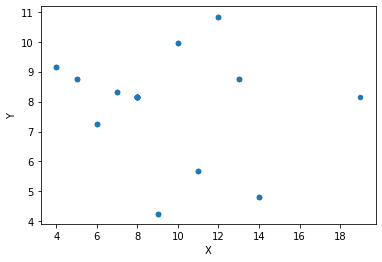

In [16]:
# TODO: put your code here
ser = pd.Series(index=df['X'],data=df['Y'])
df =ser.to_frame()

df.reset_index(inplace=True)
df.columns = ['X','Y']
df.plot(kind='scatter',x='X',y='Y')
plt.show()

## Some histograms with pandas 

Let's look at a slightly more complicated dataset.

In [17]:
car_df = local_data.cars()
car_df.head()

,Name,Miles_per_Gallon,Cylinders,Displacement,Horsepower,Weight_in_lbs,Acceleration,Year,Origin
0,chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,1970-01-01,USA
1,buick skylark 320,15.0,8,350.0,165.0,3693,11.5,1970-01-01,USA
2,plymouth satellite,18.0,8,318.0,150.0,3436,11.0,1970-01-01,USA
3,amc rebel sst,16.0,8,304.0,150.0,3433,12.0,1970-01-01,USA
4,ford torino,17.0,8,302.0,140.0,3449,10.5,1970-01-01,USA


Pandas provides useful summary functions. It identifies numerical data columns and provides you with a table of summary statistics. 

In [18]:
car_df.describe()

,Miles_per_Gallon,Cylinders,Displacement,Horsepower,Weight_in_lbs,Acceleration
count,398.000000,406.000000,406.000000,400.000000,406.000000,406.000000
mean,23.514573,5.475369,194.779557,105.082500,2979.413793,15.519704
std,7.815984,1.712160,104.922458,38.768779,847.004328,2.803359
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000
25%,17.500000,4.000000,105.000000,75.750000,2226.500000,13.700000
50%,23.000000,4.000000,151.000000,95.000000,2822.500000,15.500000
75%,29.000000,8.000000,302.000000,130.000000,3618.250000,17.175000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000


If you ask to draw a histogram, you get all of them. :)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11c1d41d0>,
      dtype=object)

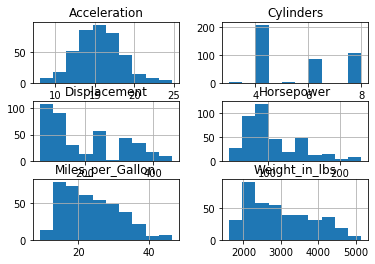

In [19]:
car_df.hist()

Well this is too small. You can check out [the documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.hist.html) and change the size of the figure. 

**Q2: by consulting the documentation, can you make the figure larger so that we can see all the labels clearly? And then make the layout 2 x 3 not 3 x 2, then change the number of bins to 20?**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11d558950>,
      dtype=object)

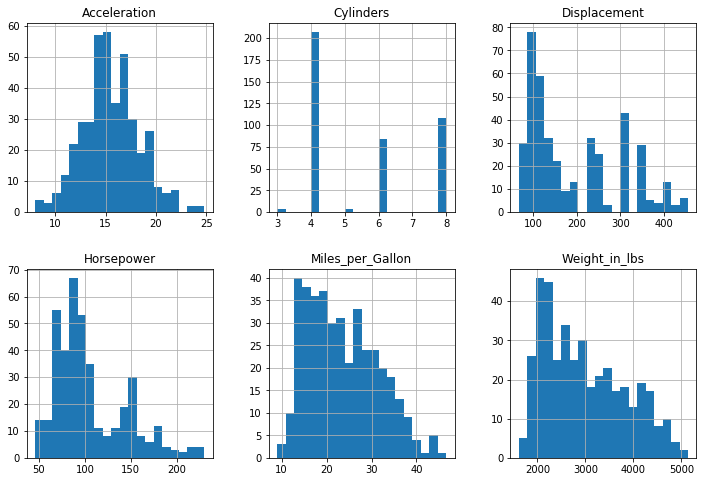

In [26]:
# TODO: put your code here
car_df.hist(figsize=(12,8), layout=(2,3), bins=20)

## Your own psychophysics experiment!

Let's do an experiment! The procedure is as follows:

1. Generate a random number between \[1, 10\];
1. Use a horizontal bar to represent the number, i.e., the length of the bar is equal to the number;
1. Guess the length of the bar by comparing it to two other bars with length 1 and 10 respectively;
1. Store your guess (perceived length) and actual length to two separate lists;
1. Repeat the above steps many times;
1. How does the perception of length differ from that of area?.

First, let's define the length of a short and a long bar. We also create two empty lists to store perceived and actual length.

In [27]:
import random
import time
import numpy as np

l_short_bar = 1
l_long_bar = 10

perceived_length_list = []
actual_length_list = []

### Perception of length

Let's run the experiment.

The [**`random`**](https://docs.python.org/3.6/library/random.html) module in Python provides various random number generators, and the [**`random.uniform(a,b)`**](https://docs.python.org/3.6/library/random.html#random.uniform) function returns a floating point number in \[a,b\]. 

We can plot horizontal bars using the [**`pyplot.barh()`**](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.barh) function. Using this function, we can produce a bar graph that looks like this:

([], <a list of 0 Text xticklabel objects>)

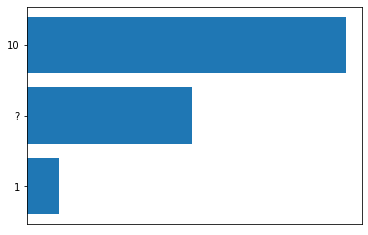

In [33]:
mystery_length = random.uniform(1, 10)  # generate a number between 1 and 10. this is the *actual* length.

plt.barh(np.arange(3), [l_short_bar, mystery_length, l_long_bar], align='center')
plt.yticks(np.arange(3), ('1', '?', '10'))
plt.xticks([]) # no hint!

Btw, `np.arange` is used to create a simple integer list `[0, 1, 2]`. 

In [34]:
np.arange(3)

array([0, 1, 2])

Now let's define a function to perform the experiment once. When you run this function, it picks a random number between 1.0 and 10.0 and show the bar chart. Then it asks you to input your estimate of the length of the middle bar. It then saves that number to the `perceived_length_list` and the actual answer to the `actual_length_list`. 

In [120]:
def run_exp_once():
    mystery_length = random.uniform(1, 10)  # generate a number between 1 and 10. 

    plt.barh(np.arange(3), [l_short_bar, mystery_length, l_long_bar], height=0.5, align='center')
    plt.yticks(np.arange(3), ('1', '?', '10'))
    plt.xticks([]) # no hint!
    plt.show()
    
    perceived_length_list.append( float(input()) )
    actual_length_list.append(mystery_length)

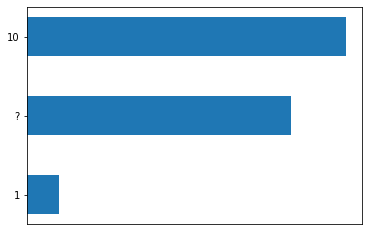

7.5


In [124]:
run_exp_once()

Now, run the experiment many times to gather your data. Check the two lists to make sure that you have the proper dataset. The length of the two lists should be the same. 

In [ ]:
# TODO: Run your experiment many times here


In [116]:
perceived_length_list, actual_length_list

([7.0, 7.0, 4.5, 4.5, 5.2, 6.0, 3.0],
 [6.555821910751654,
  7.650109217809735,
  4.662477230848289,
  4.899509277878354,
  5.615689136908871,
  6.428495870199433,
  2.0943019189311967])

### Plotting the result

Now we can draw the scatter plot of perceived and actual length. The `matplotlib`'s [**`scatter()`**](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.scatter) function will do this. This is the backend of the pandas' scatterplot. Here is an example of how to use `scatter`:

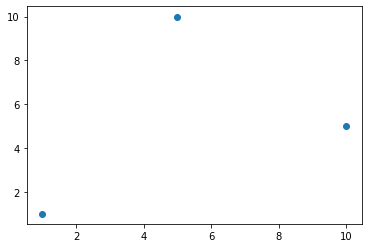

In [111]:
plt.scatter(x=[1,5,10], y=[1,10, 5])

**Q3: Now plot your result using the `scatter()` function. You should also use `plt.title()`, `plt.xlabel()`, and `plt.ylabel()` to label your axes and the plot itself.**

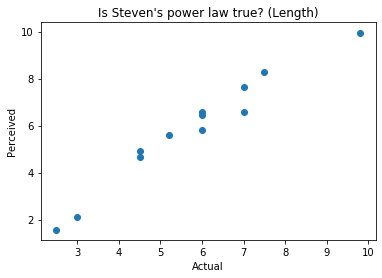

In [125]:
# TODO: put your code here
plt.title("Is Steven's power law true? (Length)")
plt.xlabel("Actual")
plt.ylabel("Perceived")
plt.scatter(x=perceived_length_list, y=actual_length_list)

After plotting, let's fit the relation between actual and perceived lengths using a polynomial function. We can easily do it using [**`curve_fit(f, x, y)`**](http://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html) in Scipy, which is to fit $x$ and $y$ using the function `f`. In our case, $f = a*x^b +c$. For instance, we can check whether this works by creating a fake dataset that follows the exact form:

**Q4: Now fit your data!** Do you see roughly linear relationship between the actual and the perceived lengths? It's ok if you don't!

In [126]:
def func(x, a, b, c):
    return a * np.power(x, b) + c

x = np.arange(20)  # [0,1,2,3, ..., 19]
y = np.power(x, 2) # [0,1,4,9, ... ]

popt, pcov = curve_fit(func, x, y)
print('{:.2f} x^{:.2f} + {:.2f}'.format(*popt))

1.00 x^2.00 + 0.00


In [133]:
# TODO: your code here
from scipy.optimize import curve_fit

def func(x, a, b):
    return a * np.power(x, b)

x=perceived_length_list
y=actual_length_list

popt, pcov = curve_fit(func, x, y)
print('{:.2f} x^{:.2f}'.format(*popt))

0.86 x^1.09


In [127]:
# TODO: your code here
from scipy.optimize import curve_fit

def func(x, a, b, c):
    return a * np.power(x, b) + c

x=perceived_length_list
y=actual_length_list

popt, pcov = curve_fit(func, x, y)
print('{:.2f} x^{:.2f} + {:.2f}'.format(*popt))

8.58 x^0.38 + -10.70


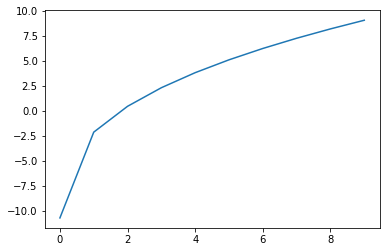

In [152]:
x = range(10)
y = 8.58*np.power(x,0.38)-10.70
plt.plot(x, y)
plt.show()

In [153]:
"""0.58x^0.38-10.70 fits my data, however since to have 0,0 and 10,10 as a range I took off c and resulted the equation
0.86x^1.09, thus n of I^n of Steven's law being 1.09"""

"0.58x^0.38-10.70 fits my data, however since to have 0,0 and 10,10 as a range I took off c and resulted the equation\n0.86x^1.09, thus n of I^n of Steven's law being 1.09"

### Perception of area

Similar to the above experiment, we now represent a random number as a circle, and the area of the circle is equal to the number.

First, calculate the radius of a circle from its area and then plot using the **`Circle()`** function. `plt.Circle((0,0), r)` will plot a circle centered at (0,0) with radius `r`.

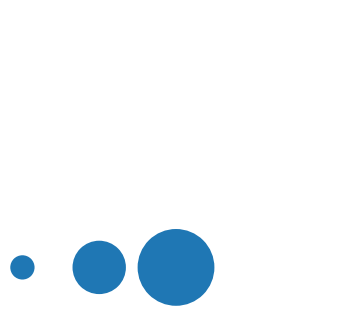

In [73]:
n1 = 0.005
n2 = 0.05

radius1 = np.sqrt(n1/np.pi) # area = pi * r * r
radius2 = np.sqrt(n2/np.pi)
random_radius = np.sqrt(n1*random.uniform(1,10)/np.pi)

plt.axis('equal')
plt.axis('off')
circ1 = plt.Circle( (0,0),         radius1, clip_on=False )
circ2 = plt.Circle( (4*radius2,0), radius2, clip_on=False )
rand_circ = plt.Circle((2*radius2,0), random_radius, clip_on=False )

plt.gca().add_artist(circ1)
plt.gca().add_artist(circ2)
plt.gca().add_artist(rand_circ)

Let's have two lists for this experiment.  

In [87]:
perceived_area_list = []
actual_area_list = []

And define a function for the experiment. 

In [68]:
import math

In [75]:
def run_area_exp_once(n1=0.005, n2=0.05):    
    radius1 = np.sqrt(n1/np.pi) # area = pi * r * r
    radius2 = np.sqrt(n2/np.pi)
    
    mystery_number = random.uniform(1,10)
    random_radius = np.sqrt(n1*mystery_number/math.pi)

    plt.axis('equal')
    plt.axis('off')
    circ1 = plt.Circle( (0,0),         radius1, clip_on=False )
    circ2 = plt.Circle( (4*radius2,0), radius2, clip_on=False )
    rand_circ = plt.Circle((2*radius2,0), random_radius, clip_on=False )
    plt.gca().add_artist(circ1)
    plt.gca().add_artist(circ2)
    plt.gca().add_artist(rand_circ)    
    plt.show()
    
    perceived_area_list.append( float(input()) )
    actual_area_list.append(mystery_number)

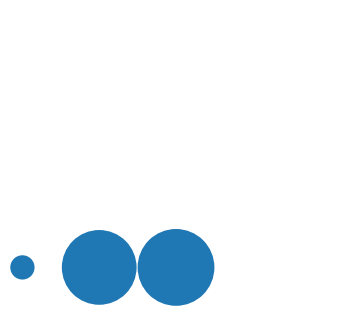

7


In [95]:
run_area_exp_once(n1=0.005, n2=0.05)

**Q5: Now you can run the experiment many times, plot the result, and fit a power-law curve!** 

In [25]:
# TODO: put your code here. You can use multiple cells. 

In [155]:
# TODO: your code here

from scipy.optimize import curve_fit

def func(x, a, b, c):
    return a * np.power(x, b) + c

x=perceived_area_list
y=actual_area_list

popt, pcov = curve_fit(func, x, y)
print('{:.2f} x^{:.2f} + {:.2f}'.format(*popt))

7.77 x^0.43 + -8.18


In [156]:
# TODO: your code here
from scipy.optimize import curve_fit

def func(x, a, b):
    return a * np.power(x, b)

x=perceived_area_list
y=actual_area_list

popt, pcov = curve_fit(func, x, y)
print('{:.2f} x^{:.2f}'.format(*popt))

1.35 x^1.04


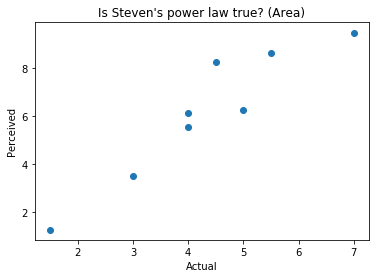

In [130]:
# TODO: put your code here
plt.title("Is Steven's power law true? (Area)")
plt.xlabel("Actual")
plt.ylabel("Perceived")
plt.scatter(x=perceived_area_list, y=actual_area_list)

What is your result? How are the exponents different from each other? 

In [132]:
"""exponents of length : 0.38, exponents of area : 0.43, area has larger exponent.
Steven's power law says its 1.0 to 0.38 and 0.7 to 0.43 respectively, so neither the accuracy of number nor the order of
the measurement (Length->Area / the other way) is correct"""

"exponents of length : 0.38, exponents of area : 0.43, area has larger exponent.\nSteven's power law says its 1.0 to 0.38 and 0.7 to 0.43 respectively, so neither the accuracy of number nor the order of\nthe measurement (Length->Area / the other way) is correct"

In [157]:
"""When I took the c(contstant) out, the exponent was 1.09 and 1.08 respectively, which means I perceive area and length accurately and in a same rate.
According to the Steven's law, the exponent of the area should be 0.7 and the length should be 1(which is accurate).
It tells that I put in regard that I am now measuring the area so I measure it larger than I actually initially perceive.
This seems to lead to accurate measurement result."""

"When I took the c(contstant) out, the exponent was 1.09 and 1.08 respectively, which means I perceive area and length accurately and in a same rate.\nAccording to the Steven's law, the exponent of the area should be 0.7 and the length should be 1(which is accurate).\nIt tells that I put in regard that I am now measuring the area so I measure it larger than I actually initially perceive.\nThis seems to lead to accurate measurement result."

In [ ]:
#jupyter nbconvert lab04_lee_jongwon.ipynb --to pdf